In [21]:
import numpy as np
import pandas as pd
import laspy
import open3d as o3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import laspy
import open3d as o3d

In [4]:
def normal(x,mu,sigma):
    return ( 2.*np.pi*sigma**2. )**-.5 * np.exp( -.5 * (x-mu)**2. / sigma**2. )

In [7]:
noise_std = 0.05
xx, yy = np.random.random((2, 1000))
wvs = [[] for i in range(1000)]
for j in range(1000):
    x, y = xx[j], yy[j]
    s = np.random.normal(loc = 0, scale = 0.075, size = 1550)
    ints = normal(s, 0, noise_std)
    x_, y_ = np.ones(len(ints))*x, np.ones(len(ints))*y
    z = s
    nz = (z - z.min() + 0.1) * 80
    bins = [[] for i in range(int(nz.max())+1)]
    bnz = [[] for i in range(int(nz.max())+1)]
    for i in range(len(nz)):
        bins[int(nz[i])].append(ints[i])
        bnz[int(nz[i])].append(z[i])
    mn, zmn = [], []
    for i in range(len(bins)):
        mn.append(np.mean(bins[i]))
        zmn.append(np.mean(bnz[i]))
    mn = np.array(mn)
    zmn = np.array(zmn)
    zz = zmn[~np.isnan(mn)]
    mn = mn[~np.isnan(mn)]
    arr = np.zeros((len(mn), 4))
    arr[:, 0] = x_[:len(mn)]
    arr[:, 1] = y_[:len(mn)]
    arr[:, 2] = zz*25
    arr[:, 3] = mn
    wvs[j].append(arr)

<IPython.core.display.Javascript object>


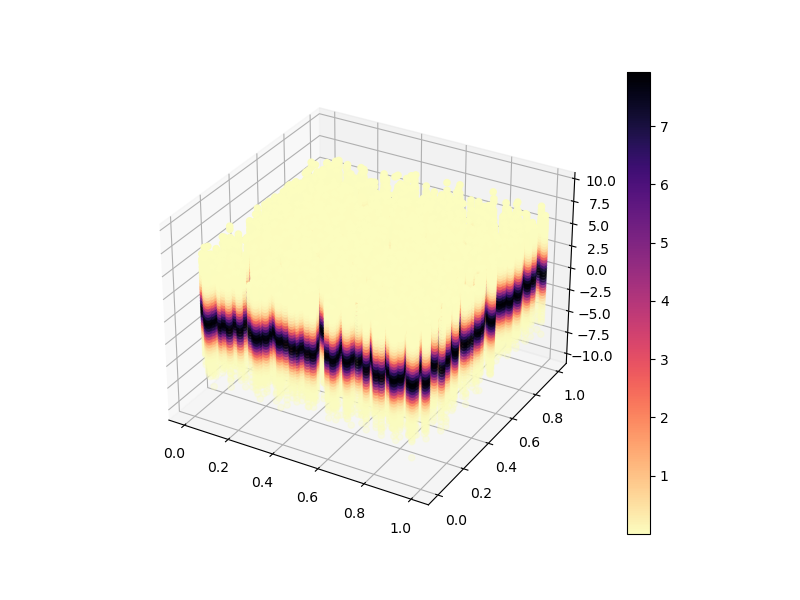

In [10]:
%matplotlib notebook
fg = pl.figure(1, (8, 6))
ax = fg.add_subplot(111, projection = '3d')
for i in range(len(wvs)):
    arr_ = np.squeeze(wvs[i])
    c = arr_[:, 3]
    im = ax.scatter(arr_[:, 0], arr_[:, 1], arr_[:, 2], c = c, cmap = pl.cm.magma_r)
cb = fg.colorbar(im, ax = ax)

In [11]:
import matplotlib.pyplot as plt # This function belongs to Dr. Aljoscha Rheinwalt
def save(fn, var, pts, cmap = plt.cm.magma_r):  
    v = np.array(var[:], dtype = 'float')
    x, y, z = pts[:, 0], pts[:, 1], pts[:, 2]
    v -= np.nanmin(v)
    v /= np.nanmax(v)
    #v /= 478.0
    rgb = cmap(v)
    rgb = rgb[:, :3]
    rgb *= 65535
    rgb = rgb.astype('uint')
    header = laspy.header.Header()
    header.data_format_id = 2
    g = laspy.file.File(fn, mode = 'w', header = header)
    g.header.scale = [0.001, 0.001, 0.001]
    g.header.offset = [x.min(), y.min(), z.min()]
    g.x = x
    g.y = y
    g.z = z
    g.set_red(rgb[:, 0])
    g.set_green(rgb[:, 1])
    g.set_blue(rgb[:, 2])
    g.close()

In [12]:
wvs = np.squeeze(np.array(wvs))
synt = np.concatenate(wvs.ravel())

In [14]:
import laspy
save('synthetic.laz', synt[:, 3], synt[:, :3])

In [15]:
pk = []
for i in range(len(wvs)):
    pk.append(wvs[i][np.argmax(wvs[i][:, 3])])
pk = np.array(pk)

<IPython.core.display.Javascript object>


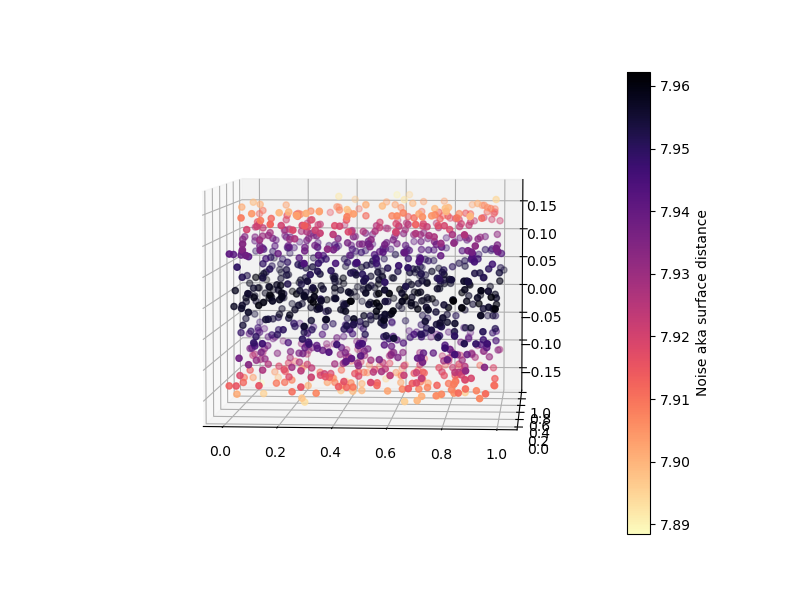

In [19]:
%matplotlib notebook
c = np.abs(pk[:, 3])
fg = pl.figure(1, (8, 6))
ax = fg.add_subplot(111, projection = '3d')
im = ax.scatter(pk[:, 0], pk[:, 1], pk[:, 2], c = c, cmap = pl.cm.magma_r)
cb = fg.colorbar(im, ax = ax)
cb.set_label('Noise aka surface distance')

In [20]:
save('synthetic_peaks.laz', pk[:, 3], pk[:, :3])